# **AP157 Module C Lab Assignment**

## Module C2: Monte Carlo Methods

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: This lab assignment is based on work by Dr. Reyes in collaboration with Gene Belinario and Dr. Reginald Bernardo.

### Student Information

_Full Name (Last Name, First Name)_: Manliguez, Sean Arthur \
_Student No._: 2020-07582 \
_Section_: TX - 1

### Submission Information

_Date and Time Submitted (most recent upload)_: May 23, 2024 11:30 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SEAN ARTHUR C. MANLIGUEZ

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/20
* Part 3 - []/30
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In this lab assignment, you will generate constraints on cosmological parameters, the Hubble parameter H_0 and matter density Omega_m,0, from (synthetic) Hubble diagram data points from gravitational-wave (GW) sirens observed from 3 GW observatories: LIGO, LISA, and Einstein Telescope (ET).

The datasets are in the Google Drive "Datasets" Folder under "AP157_moduleC2" subfolder: https://drive.google.com/drive/folders/1UnK1AggxdsjtG3PoOcyXfpahBcWjOBzj?usp=drive_link.

Read in the 3 datasets from the CSV files: LIGO.csv, LISA.csv, ET.csv. The columns are redshift (z), luminosity distance (dL), and error in the luminosity distance (err). The distances are in units of Gpc (giga-parsecs).

Load the data into variable names: zLIGO, dLLIGO, errLIGO, zLISA, dLLISA, errLISA, and zET, dLET, and errET, respectively. Note that these variable names will be used in later parts of the code, so you have to use these names for compatibility.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/AP157/Datasets/"

In [ ]:
LIGO = pd.read_csv(file_path + "LIGO.csv")
LISA = pd.read_csv(file_path + "LISA.csv")
ET = pd.read_csv(file_path + "ET.csv")

By the end of the lab assignment, you will generate constraints on the cosmological parameters H_0 and omega_m,0 for 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET (combined). You will generate a corner plot to visualize these constraints similar to the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

In [ ]:
display(LIGO)

,zLIGO,dlLIGO,errLIGO
0,0.033270,0.101250,0.026146
1,0.106210,0.698621,0.137968
2,0.073820,0.338016,0.067550
3,0.047333,0.206075,0.034506
4,0.113966,0.401371,0.159718
...,...,...,...
95,0.140751,0.607664,0.249926
96,0.170735,1.064420,0.380081
97,0.073560,0.278404,0.067117
98,0.113640,0.456064,0.158766


Here, I assigned the data to new variables for convenience later.

In [ ]:
zLIGO = LIGO["zLIGO"] # redshift of LIGO
dlLIGO = LIGO["dlLIGO"] #luminosity distance of LIGO
errLIGO = LIGO["errLIGO"] #error of LIGO
zLISA = LISA["zLISA"]# redshift of LIGO
dlLISA = LISA["dlLISA"]  #luminosity distance of LISA
errLISA = LISA["errLISA"]# error of LISA
zET = ET["zET"]# redshift of LIGO
dlET = ET["dlET"] #luminosity distance of ET
errET = ET["errET"]# error of ET

#### PART 1 - Generate Hubble Diagram *(20 points)*

Make a Hubble diagram plot-- with luminosity distance (d_L) in the vertical axis and redshift (z) in the horizontal axis. Show the errors in d_L as error bars.

Plot GW sirens from the 3 observatories in the same plot and include a legend. Briefly describe the difference between the samples from the 3 observatories.

In [ ]:
import matplotlib.pyplot as plt

The redshift-luminosity distance tells us evolution of the universe. The redshift is due to the expansion of the universe. The luminosity distance is determined from the objects known luminosity and measure flux [1]. Based on the plot below, we see that LISA captures the objects with higher redshifts and luminosity distance more than the rest. It is followed by ET, and lastly by LIGO. Additionally, in all three datasets the error gets larger at the higher redshift values.

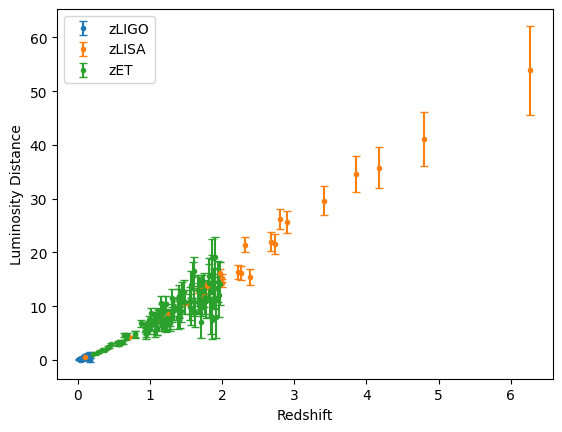

In [ ]:
plt.errorbar(zLIGO,dlLIGO, yerr=errLIGO, ls = '', capsize = 3, fmt = 'o', ms = 3, label = "LIGO")#, capsize=3, fmt="r--o", ecolor = "black")
plt.errorbar(zLISA,dlLISA, yerr=errLISA, ls = '', capsize = 3, fmt = 'o', ms = 3, label = "LISA")#, capsize=3, fmt="r--o", ecolor = "black")
plt.errorbar(zET,dlET, yerr=errET, ls = '', capsize = 3, fmt = 'o', ms = 3, label = "ET")#, capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance")
plt.legend()

#### PART 2 - Define likelihood functions *(20 points)*

In this analysis, we will assume the cosmological model to be flat LambdaCDM universe. This is given by the `FlatLambdaCDM' model from the astropy.cosmology package. In particular, we use the model for the luminosity distance as a function of redshift, which is encoded in the luminosity_distance function.

Below, define the chi-square and likelihood function to be used for the LIGO only and the LIGO+LISA dataset. You are asked to define the analogous functions for the LIGO+LISA+ET dataset. Note that the likelihood for the combined dataset is simply the sum of the likelihoods for the individual datasets.




In [ ]:
from astropy.cosmology import FlatLambdaCDM

The chi-squared error is given by
$$
\chi_i^2 = \left(\frac{y_i-y_{model}}{y_{err}}\right)^2.
$$
This is important in getting the likeness, which is characterized by the equation
$$
L_{lnlike} = -\frac{1}{2}\sum_i\chi_i^2
$$

`H0` and `Om0` refer to the Hubble Parameter and Matter Density respectively. These are the parameters that we aim to constrain in our model using Markov Chain Monte Carlo (MCMC). With what we expect of the system, we can impose priors to the Hubble Parameter and Matter Density.

These functions takes the argument `theta` which is a vector containing `H0` and `Om0`. I used `theta` so that later on when using `p0`, the `emcee.EnsembleSampler` only needs to pass on one variable. The functions with `llike` compute for the likeness (probability).

The function `FlatLambdaCDM` comes from the `astropy` libray. It takes inputs of `H0` and `Om0`. From this, we generate the model for the luminosity distance using `cosmo.luminosity_distance`.

In [ ]:
# def chi2LIGO_lcdm(H0, Om0):
def chi2LIGO_lcdm(theta):
    H0, Om0 = theta
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)      # define cosmological model
    model = np.array(cosmo.luminosity_distance(zLIGO)/1000) # converted from Gpc to Mpc units

    #calculating chi^2
    dev = (model - np.array(dlLIGO))/np.array(errLIGO)      # deviations between model and data
    chi2 = sum(dev**2)
    return chi2

def llikeLIGO_lcdm(theta):
    H0, Om0 = theta
    if (H0 < 0) or (Om0 < 0):
        return -np.inf                        # return inf if outside priors
    else:
        return -0.5*chi2LIGO_lcdm(theta)

# LIGO + LISA
def chi2LISA_lcdm(theta):
    H0, Om0 = theta
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zLISA)/1000)
    dev = (model - np.array(dlLISA))/np.array(errLISA)
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISA_lcdm(theta):
    H0, Om0 = theta
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(theta) + chi2LISA_lcdm(theta))

# LIGO + LISA + ET
def chi2ET_lcdm(theta):
    H0, Om0 = theta
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0, Tcmb0=2.725)
    model = np.array(cosmo.luminosity_distance(zET)/1000)
    dev = (model - np.array(dlET))/np.array(errET)
    chi2 = sum(dev**2)
    return chi2

def llikeLIGOLISAET_lcdm(theta):
    H0, Om0 = theta
    if (H0 < 0) or (Om0 < 0):
        return -np.inf
    else:
        return -0.5*(chi2LIGO_lcdm(theta) + chi2LISA_lcdm(theta) + chi2ET_lcdm(theta))

#### PART 3 - Perform MCMC runs *(30 points)*

Use the emcee library to set up and perform MCMC runs for the 3 samples: LIGO only, LIGO+LISA, and LIGO+LISA+ET combined.

You can use number of walkers (nwalkers) of 6 and number of iterations (niter) of 5,000 and number of burn-in samples (nburn) of 100.


In [ ]:
#!pip install emcee
import emcee

To begin the MCMC runs, I set up the conditions below. The variable `nwalkers` refers to the number of walkers. These walkers are defined by the vector `theta`. The number of burn in-samples is `nburn`, these are the number of iterations discarded or "burnt away" in the beginning of the run. The goal of this MCMC is to find a set of parameters `H0` and `Om0` that best models the data from the GW sirens. The variable `p0` is responsible for the "random walk"

In [ ]:
nwalkers = 6 #number of walkers
niter = 5000 #number of iterations
nburn = 100 #number of burn-in samples
initial = np.array([70,0.3]) #initial parameters
ndim = len(initial) #number of parameters
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)] #"the methodology of stepping from one place to a grid to the next "

I defined a main function `main()` based on the sample code from [2]. This code uses `p0,nwalkers,niter,ndim,lnprob` as the arguments. The argument `lnprob` is the probability generating functin. In this case the functions above beginning in `llike`. I then used the `emcee` library function `emcee.EnsembleSampler` to create the sample. This Ensemble Sampler creates a sampler by establishing an ensemble of walkers. This sampler is then used to sample the model to get the highest likeness with the given data GW sirens.

The argument `lnprob` is a callable function that takes `p0[0]`, which is a vector, as an input.

The function `sampler.run_mcmc` then runs the MCMC with `p0` as the walkers for a number of `nburn` and `niter` times.

In [ ]:
def main(p0,nwalkers,niter,ndim,lnprob):
 sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob) #creating the samplers given the conditions in the argument
 print("Running burn-in...")
 p0, _, _ = sampler.run_mcmc(p0, nburn) #burning-in samples
 sampler.reset() #reset the sampler after the burn-in
 print("Running production...")
 pos, prob, state = sampler.run_mcmc(p0, niter) #running MCMC
 return sampler, pos, prob, state


I then ran the MCMC on the data of LIGO, LIGO+LISA, and LIGO+LISA+ET to create their samplers.

In [ ]:
ligo_sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,llikeLIGO_lcdm) #MCMC samples from LIGO dataset

Running burn-in...
Running production...


In [ ]:
ligolisa_sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,llikeLIGOLISA_lcdm) #MCMC samples from LIGO+LISA datasets

Running burn-in...
Running production...


In [ ]:
ligolisaet_sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,llikeLIGOLISAET_lcdm)#MCMC samples from LIGO+LISA+ET datasets

Running burn-in...
Running production...


WIth this samplers, I extracted the samples using `.flatchain, which is a method that extracts the output of the sampler into a flat array.

In [ ]:
#extracting the samples to find the contraints on H0 and Om0 given the datasets
ligo_samples = ligo_sampler.flatchain
ligolisa_samples = ligolisa_sampler.flatchain
ligolisaet_samples = ligolisaet_sampler.flatchain

#### PART 4 - Generate corner plot to visualize the constraints *(30 points)*

Overlay the results for the 3 samples for easy comparison. Your plot should resemble the figure here: https://drive.google.com/file/d/18H7GPlox4ijS9qFbk1rHo-NW5N_Nsfer/view?usp=drive_link

Briefly describe the difference between the constraints obtained from the different samples.

In [ ]:
#!pip install corner
import corner

In [ ]:
import matplotlib.lines as mlines

I then plotted a corner plot of the samples extracted. From this plot, we see that the constraints become stricter with more datasets included in the MCMC run. LIGO alone only broadly contrains the Hubble Parameter and Matter Density. With the addition of LIGO+LISA, we get a more specific constraint. These results are dependent on the posterior probability, which is set by the priors.

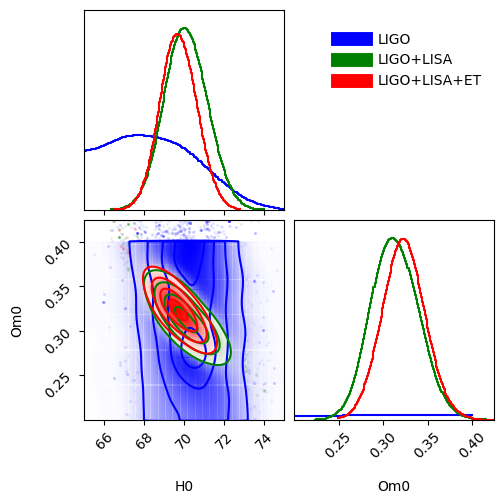

In [ ]:
#visualization
labels = ['H0','Om0']
colors = ['b', 'g', 'r']
sample_labels = ["LIGO", "LIGO+LISA", "LIGO+LISA+ET"]
fig = corner.corner(ligo_samples, bins = np.sqrt(np.shape(ligo_samples)[0]),labels=labels, color=colors[0],smooth = 15, smooth1d = 10, range = [(65,75),(0.2,0.4)] )#,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
corner.corner(ligolisa_samples, bins = np.sqrt(np.shape(ligo_samples)[0]),labels=labels, fig = fig, color=colors[1],smooth = 10, smooth1d = 10, ls = '--' )#,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])
corner.corner(ligolisaet_samples, bins = np.sqrt(np.shape(ligo_samples)[0]),labels=labels, fig = fig, color=colors[2],smooth = 10, smooth1d = 10, ls = '--' )#,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84], color='green')


plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i], linewidth =10)
            for i in range(3)
        ],
        fontsize=10, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )

### References:
The codes and general knowledge of MCMC was obtain from [1].

[1] https://user-web.icecube.wisc.edu/~halzen/notes/week1-3.pdf

[2] https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial_Solution.html